In [2]:
# Imports and settings

import sys
sys.path.append('../')

from common.setups import *

from datetime import datetime
import numpy as np
from os import environ
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from datetime import datetime
import json

data_folder = 'data/'

config_ipython()
setup_matplotlib()
set_css_style()

# The story of the Stack Overflow tags

Fetching all tags from the StackOverflow API 

### NOTES
---

* Synonyms tags have same counts as mother tag (checked from website) and when tags are requested, the mother tag is retrieved (so in the DF below we have mother tags and the global usage of it plus its synonyms)

> TODO explain all

> TODO 

See how many tags there are in the first place and whether can take them all? Roughly 

## The questions

* old gets richer? how much?
* process of creating new tags in time, what trend?
* popularity in time of some tags
* how do get tags be collapsed to synonyms?

Keep this in mind https://stackoverflow.blog/2017/05/09/introducing-stack-overflow-trends/

## Read data into a dataframe

In [12]:
df = pd.read_json(data_folder + 'tags_data.json', orient='index')

## Manipulate a bit

In [13]:
# Set a column for creation date in datetime

df['creation_date_date'] = df['creation_date'].apply(datetime.fromtimestamp)

In [14]:
# Set a column for the number of synonyms

df['num_synonyms'] = df['synonyms'].apply(len)

In [16]:
df.head()

,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,num_synonyms
.htaccess,60983,1218010528,1,0,0,.htaccess,[htaccess],2008-08-06 09:15:28,1
.net,262711,1217547659,1,0,0,.net,"[.net-framework, dot-net, dotnet]",2008-08-01 00:40:59,3
.net-3.5,5785,1217566773,1,0,0,.net-3.5,[.net-framework-3.5],2008-08-01 05:59:33,1
.net-4.0,8592,1222697573,1,0,0,.net-4.0,"[.net-framework-4.0, .net4]",2008-09-29 15:12:53,2
.net-core,6029,1314097465,1,0,0,.net-core,"[dotnetcore, dotnet-core]",2011-08-23 12:04:25,2


In [17]:
df.describe()

,count,creation_date,has_synonyms,is_moderator_only,is_required,num_synonyms
count,1.000000e+03,1.000000e+03,1000.00000,1000.0,1000.0,1000.000000
mean,3.382785e+04,1.236501e+09,0.60200,0.0,0.0,1.368000
std,1.097497e+05,4.096053e+07,0.48973,0.0,0.0,2.202141
min,5.331000e+03,1.217541e+09,0.00000,0.0,0.0,0.000000
25%,7.264750e+03,1.217995e+09,0.00000,0.0,0.0,0.000000
50%,1.166550e+04,1.219364e+09,1.00000,0.0,0.0,1.000000
75%,2.376775e+04,1.225131e+09,1.00000,0.0,0.0,2.000000
max,1.539243e+06,1.456536e+09,1.00000,0.0,0.0,29.000000


## A few starting stats and info

In [24]:
# who are the oldest tags

df.sort_values('creation_date', ascending=True).head()

,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,num_synonyms
type-conversion,8356,1217540572,1,0,0,type-conversion,"[typeconverting, data-type-conversion]",2008-07-31 22:42:52,2
winforms,78063,1217540572,1,0,0,winforms,"[windows.forms, winform, window-form, windows-...",2008-07-31 22:42:52,6
c#,1170433,1217540572,1,0,0,c#,"[.cs-file, csharp, visual-c#, c#-language, c#....",2008-07-31 22:42:52,6
css,514186,1217542088,1,0,0,css,"[css-font-weight, dynamic-css, css-borders, cs...",2008-07-31 23:08:08,29
html,718115,1217542088,1,0,0,html,"[span, html-comments, div-layouts, nested-divs...",2008-07-31 23:08:08,8


In [25]:
df[df['name'] == 'javascript']

,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,num_synonyms
javascript,1539243,1217551358,1,0,0,javascript,"[javascript-module, vanilla-javascript, javasc...",2008-08-01 01:42:38,12


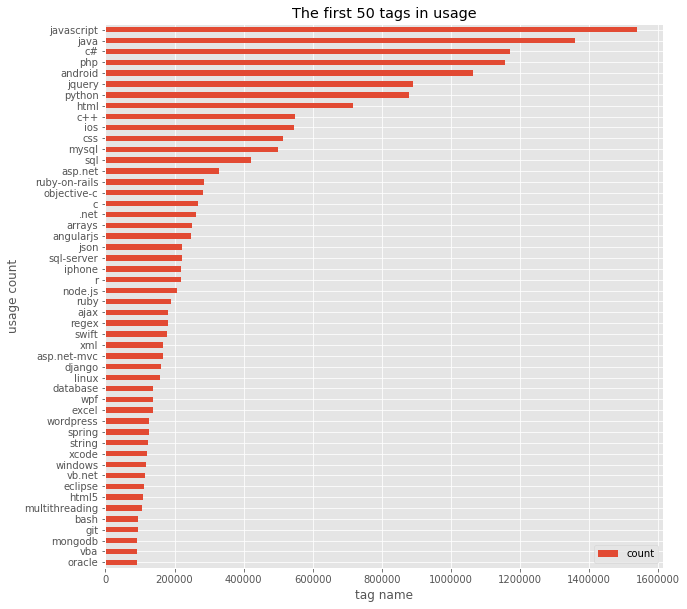

In [27]:
# Usage of the first 50 tags

rcParams['figure.figsize'] = (10, 10)                         # just for the sake of this fig

df.sort_values('count', ascending=False).head(50).plot('name', 'count', kind='barh')
plt.title('The first 50 tags in usage')
plt.xlabel('tag name')
plt.ylabel('usage count')
#plt.savefig('so_50tags.jpeg')
plt.gca().invert_yaxis()
plt.show();

### Get questions

In [100]:
# # Request questions, from old to newer
# questions_r = so.fetch('questions', order='asc', sort='creation')

In [101]:
# # Dump questions response to JSON file

# f = open(data_folder + 'questions_resp.json', 'w')
# json.dump(questions_r['items'], f, indent=4)

In [21]:
# Add columns for the number of days and hours since creation date till now

today = datetime.today()

df['num_days'] = (today - df['creation_date']).astype('timedelta64[D]')
df['num_hours'] = (today - df['creation_date']).astype('timedelta64[h]')

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'int'

In [80]:
df.to_csv(data_folder + 'tags_df.csv')

### Plotting

In [27]:
# Sum, mean and std of usage when tags have synonyms and not

df_syn_agg = df.groupby('has_synonyms').agg({'count': ['sum', 'mean', 'std']}).reset_index()
df_syn_agg.columns = ['has_synonyms', 'sum_count', 'mean_count', 'std_count']

In [28]:
df_syn_agg

,has_synonyms,sum_count,mean_count,std_count
0,0,2756041,64093.976744,50310.806353
1,1,21916131,139593.191083,249170.115267


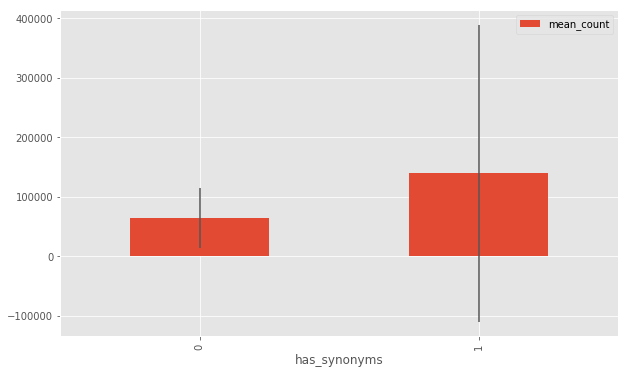

In [29]:
df_syn_agg.plot('has_synonyms', 'mean_count', kind='bar', yerr='std_count')
plt.show()

### Plots
---

* First 50 tags in usage
* Histogram usage of tags
* Zipf (usage-rank)

In [30]:
# Usage of the first 50 tags

rcParams['figure.figsize'] = (10, 10)                         # just for the sake of this fig

df.loc[:50].plot('name', 'count', kind='barh')
plt.title('The first 50 tags in usage')
plt.xlabel('tag name')
plt.ylabel('usage count')
#plt.savefig('so_50tags.jpeg')
plt.gca().invert_yaxis()
plt.show();

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [50] of <type 'int'>

In [71]:
rcParams['figure.figsize'] = (10, 6)                         # resetting

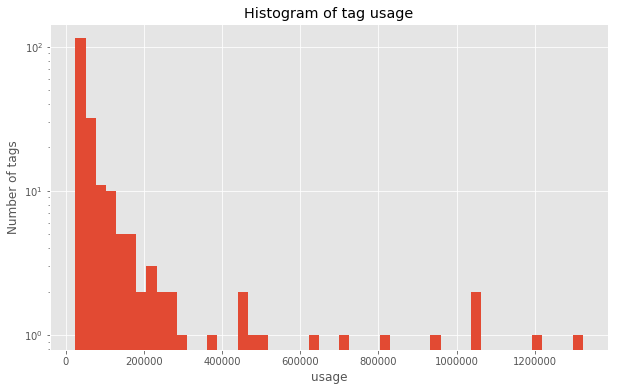

In [72]:
# Histogram usage of tags

df.hist('usage', bins=50, log=True)
plt.title('Histogram of tag usage')
plt.xlabel('usage')
plt.ylabel('Number of tags')
plt.plot();

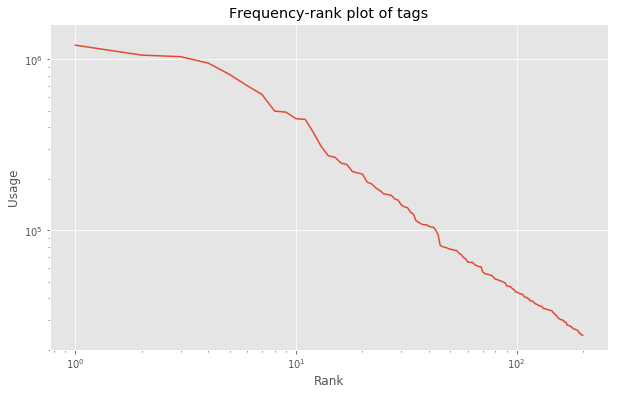

In [73]:
# Frequency-rank in log-log (Zipf)

plt.loglog([i for i in range(df.count()['name'])], list(df.sort_values('usage', ascending=False)['usage']))
plt.title('Frequency-rank plot of tags')
plt.xlabel('Rank')
plt.ylabel('Usage')
plt.show();

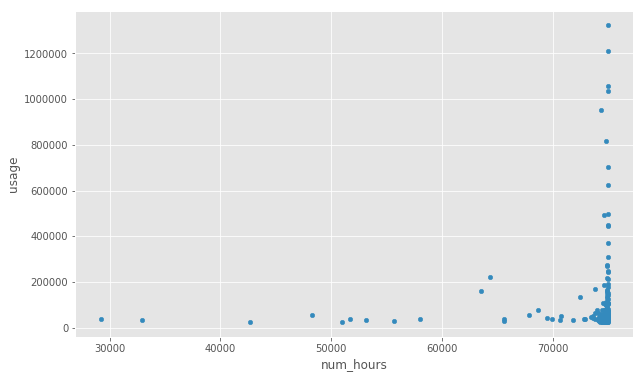

In [59]:
# Usage vs time been there

df.sort_values('num_hours', 
               ascending=False).plot('num_hours', 'usage', kind='scatter', logx=False, logy=False);

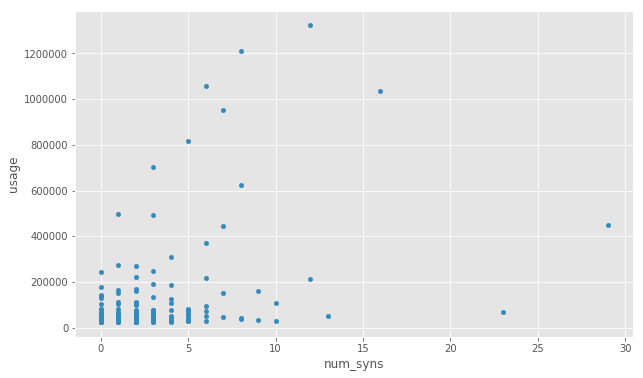

In [82]:
# Usage vs num synomyms

df.plot('num_syns', 'usage', kind='scatter');

In [84]:
# TODO questions: how old and how many votes: scatter
# idea e' quantificare quanto e' vero che old gets richer